# Arbeitsblatt 2: Lineare Regression, Eigengesichter und Bayes-Klassifikator

## 1. Linear Regression on Fish Data

The following data-set contains the number of fish groups of camper caught in a state park (taken from https://stats.idre.ucla.edu/r/dae/zip/). Your task here is to predict the number of fish caught by a fishing party from the following information: 

* how many people are in the group
* the number children in the group
* the use of live bait
* whether the group came with a camper to the park. 

We have a small data set, of 250 groups, which visited a state park and provided. For comparison the data set is already split into a training set and testset.

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from numpy.ma.core import indices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [40]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve

if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz', filename='fishing.npz')
d = np.load('fishing.npz')
Xt = d['Xt']  #"livebait","camper","persons","child"
Xte = d['Xte']  #test_data
yt = d['yt']  #n fishes
yte = d['yte']  #

Xt

array([[1., 0., 4., 0.],
       [1., 1., 2., 0.],
       [1., 1., 3., 0.],
       [1., 1., 3., 2.],
       [1., 1., 4., 1.],
       [1., 0., 1., 0.],
       [1., 0., 3., 1.],
       [1., 0., 3., 0.],
       [1., 1., 3., 2.],
       [1., 1., 2., 1.],
       [1., 0., 2., 0.],
       [1., 1., 2., 0.],
       [1., 0., 4., 1.],
       [1., 1., 1., 0.],
       [1., 0., 4., 1.],
       [1., 1., 3., 0.],
       [1., 1., 2., 0.],
       [1., 1., 4., 1.],
       [1., 0., 4., 0.],
       [0., 0., 2., 0.],
       [1., 1., 3., 2.],
       [1., 1., 1., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 1., 1., 0.],
       [1., 1., 3., 0.],
       [1., 0., 4., 3.],
       [1., 1., 1., 0.],
       [1., 0., 4., 0.],
       [0., 0., 4., 1.],
       [1., 1., 4., 2.],
       [1., 1., 1., 0.],
       [0., 0., 3., 2.],
       [1., 0., 4., 2.],
       [1., 1., 3., 0.],
       [1., 1., 1., 0.],
       [1., 1., 4., 3.],
       [0., 1., 4., 3.],
       [1., 0., 2., 0.],
       [0., 1., 3., 2.],


a) Do a linear regression by creating a design matrix with the intercept term and use the fomulae given in the lecture to determine the coefficients on the training set.

In [41]:
intercept = np.ones((len(Xte[:, 1]), 1))
design_Matrix_test = np.hstack((intercept, Xte))

intercept = np.ones((len(Xt[:, 1]), 1))
design_matrix = np.hstack((intercept, Xt))
design_matrix

array([[1., 1., 0., 4., 0.],
       [1., 1., 1., 2., 0.],
       [1., 1., 1., 3., 0.],
       [1., 1., 1., 3., 2.],
       [1., 1., 1., 4., 1.],
       [1., 1., 0., 1., 0.],
       [1., 1., 0., 3., 1.],
       [1., 1., 0., 3., 0.],
       [1., 1., 1., 3., 2.],
       [1., 1., 1., 2., 1.],
       [1., 1., 0., 2., 0.],
       [1., 1., 1., 2., 0.],
       [1., 1., 0., 4., 1.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 4., 1.],
       [1., 1., 1., 3., 0.],
       [1., 1., 1., 2., 0.],
       [1., 1., 1., 4., 1.],
       [1., 1., 0., 4., 0.],
       [1., 0., 0., 2., 0.],
       [1., 1., 1., 3., 2.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 2., 0.],
       [1., 1., 0., 2., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 3., 0.],
       [1., 1., 0., 4., 3.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 4., 0.],
       [1., 0., 0., 4., 1.],
       [1., 1., 1., 4., 2.],
       [1., 1., 1., 1., 0.],
       [1., 0., 0., 3., 2.],
       [1., 1., 0., 4., 2.],
       [1., 1.

In [42]:
w = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ yt
w

array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])

Result: array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])
Don't forget the intercept, you should have 5 numbers!

b) Repeat a) but this time with LinearRegression from sklearn.linear_model


In [43]:
model = LinearRegression(fit_intercept=False)
model.fit(design_matrix, yt)
w_sklearn = model.coef_
w_sklearn

array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])

Result: array([-8.49222821, 2.4822138 , 2.95430727, 4.64953914, -5.47160051]) Don't forget the intercept, you should have 5 numbers!

c) Determine the Root Mean Square Error (RMSE) and the average negative log-likelihood (NLL) on the testset. For NLL we assume that the conditional probability distrubution (CPD) $p(y|x)$ is given by the density of a Gaussian with constant variance $\sigma^2$. Estimate $\sigma^2$ using the variance of the residuals. Use the variance estimation with $1/N$. 


In [44]:
yte_hat = design_Matrix_test @ w
residuals = yte_hat - yte.flatten()
mse = np.mean(np.square(residuals))
rmse = np.sqrt(mse)

var = np.var(residuals)

nll = 0.5 * np.sum(np.log(2 * np.pi * var) + 1)

print(f"Result RMSE = {rmse}, var = {var}, NLL = {nll}")

Result RMSE = 8.58812638673423, var = 73.48030359919807, NLL = 3.567447229236674


Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

d) For the testset: plot the predicted mean number of fish caught ($\mu$) against observed number of fish caught. Further include the 2.5 and 97.5 precentile of p(y|x), the conditional predictive distribution (CPD) of $y$ for a given $x$. Why is a Gaussian not ideal for that kind of data? 

Hint: For the Gaussian the 2.5% and the 97.5% percentile is approximatiy given by $\mu \pm 1.96*\sigma$

In [45]:
mean_yte = np.mean(yte)
mean_yte_hat = np.mean(yte_hat)
percentile_hat = 1.96 * np.std(yte_hat)
percentile = 1.96 * np.std(yte)
print(np.std(yte))
print(np.std(yte_hat))
print(f"Pred: mean = {mean_yte_hat}, 2,5% = {mean_yte_hat - percentile_hat}, 97,5% = {mean_yte_hat + percentile_hat}")
print(f"Actual: mean = {mean_yte}, 2,5% = {mean_yte - percentile}, 97,5% = {mean_yte + percentile}")

10.120099
4.578237511518334
Pred: mean = 3.5849868906198226, 2,5% = -5.3883586319561125, 97,5% = 12.558332413195757
Actual: mean = 3.059999942779541, 2,5% = -16.775394439697266, 97,5% = 22.89539337158203


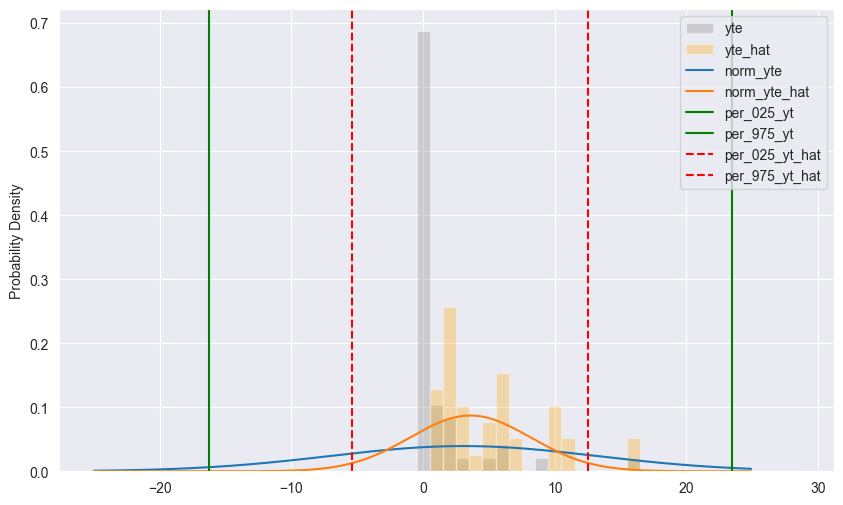

In [46]:
x = np.arange(-25, 25, 0.1)
norm_yte = scipy.stats.norm.pdf(x, mean_yte, np.std(yte))
norm_yte_hat = scipy.stats.norm.pdf(x, mean_yte_hat, np.std(yte_hat))

per_025_yt = scipy.stats.norm.ppf(0.025, mean_yte_hat, np.std(yte))
per_025_yt_hat = scipy.stats.norm.ppf(0.025, mean_yte_hat, np.std(yte_hat))
per_975_yt = scipy.stats.norm.ppf(0.975, mean_yte_hat, np.std(yte))
per_975_yt_hat = scipy.stats.norm.ppf(0.975, mean_yte_hat, np.std(yte_hat))

plt.figure(figsize=(10, 6))
plt.hist(yte, bins=np.arange(0, 30) - 0.5, density=True, color='gray', alpha=0.3, label='yte')
plt.hist(yte_hat, bins=np.arange(0, 30) - 0.5, density=True, color='orange', alpha=0.3, label='yte_hat')
plt.plot(x, norm_yte, label='norm_yte')
plt.plot(x, norm_yte_hat, label='norm_yte_hat')
plt.axvline(per_025_yt, color='green', label='per_025_yt')
plt.axvline(per_975_yt, color='green', label='per_975_yt')
plt.axvline(per_025_yt_hat, color='red', linestyle="--", label='per_025_yt_hat')
plt.axvline(per_975_yt_hat, color='red', linestyle="--", label='per_975_yt_hat')

plt.ylabel('Probability Density')
plt.legend()
plt.show()


Gaussverteilung ist symmetrisch, daher auch negative werte bei großer Standartabweichung und entsprechendem Durchschnitt

e) This data is count data. Count data has only positive values and also the distribution is discrete. You cannot catch 0.5 fish and that the CPD has probability density > 0 on negative number of fish is wrong too. A Gaussian as a CPD is therefore not ideal. 

Now use a Poissonian as CPD. If we assume a Poissonian then the probability to catch $k$ fish is given by 
$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

and the NLL is thus by:

$$
 \text{NLL} = -\log(p(ki)) = \mu  - ki \cdot \log(\mu) + \log(ki!)
$$

with $\mu$ being the expectation. In our case the average number of fish expected.

In the case of the probabilistic interpretation of the linear regression, $y_i$ for a given $x_i$ is distributed like a Gaussian. The paramter $\mu_i$ from $N(\mu_i,\sigma^2)$ has been determined from $x_i$ via $\mu_i= \beta^T \cdot x_i$ by minimizing the NLL. 

A small additional detail: For the Poissonian case, $\mu_i$ needs to be positive. We therefore do not use $\beta^T \cdot x_i$ directly but "pipe it through" an exponential first to make it positive and thus link $\mu_i=exp(\beta^T \cdot x_i)$ to the data.

Use a gradient descent approach on the NLL to find the solution for the parameters. Calculate the RMSE and the NLL on the test set and compare with c).

Hint: On the trainingset for the parameter values (1,1,1,1,1) the NLL should be approx 1508 and the gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7). For the NLL a good learning rate would be 0.001 and training should be done for at least 5000 epochs.

log(k!), kann weggelassen werden, da in Partieller ableitung eine Konstante ohne beta und fällt daher bei der partiellen ableitung weg.
 
exp(b*xi) --> xi*exp(b*xi) = xi*mu
-k(log(mu)) -> -k 1/mu * xi*mu (kettenregel)-> -k*xi

zusammen xi * mu - k*xi = (mu - k)xi




In [47]:
def nll_poisson(design_matrix, yt, beta):
    nll = 0
    for xi, yi in zip(design_matrix, yt):
        mu = np.exp(xi @ beta)
        nll_i = mu - yi * np.log(mu) + np.log(float(math.factorial(int(yi))))
        nll = nll + nll_i

    return nll / len(yt)

In [48]:
def gradient_poisson(design_matrix, yt, beta):
    mu = np.exp(design_matrix @ beta)
    gradient = (mu - yt) @ design_matrix

    return gradient / len(yt)


In [49]:
beta = np.ones(len(design_matrix[0]))

gradient = gradient_poisson(design_matrix, yt, beta)
nll = nll_poisson(design_matrix, yt, beta)

print(f"beta: {beta}\nNLL = {nll}\nGradient = {gradient}")

beta: [1. 1. 1. 1. 1.]
NLL = 1507.9856602262093
Gradient = [1518.61304305 1403.99474131 1171.02247951 5701.91224653 3258.70389229]


In [50]:
beta = np.ones(len(design_matrix[0]))
learning_rate = 0.001
epochen = 5000

# Gradient descent
for iteration in range(epochen):
    gradient = gradient_poisson(design_matrix, yt, beta)
    beta = beta - (learning_rate * gradient)

    if iteration % 250 == 0:
        nll = nll_poisson(design_matrix, yt, beta)
        yte_hat = np.matmul(design_Matrix_test, beta).flatten()

        print(f"epoche: {iteration}, NLL: {nll}, beta = {beta}")

print(f"Final:\nbeta: {beta}\nNLL = {nll}\nGradient = {gradient}")

epoche: 0, NLL: 65.61582209378287, beta = [-0.51861304 -0.40399474 -0.17102248 -4.70191225 -2.25870389]
epoche: 250, NLL: 26.221284710645588, beta = [ 0.31462384  0.41097469  0.48763027 -1.86775269 -2.10374041]
epoche: 500, NLL: 5.363444125899285, beta = [ 0.67378559  0.7807983   0.78153486  0.06582337 -1.98036082]
epoche: 750, NLL: 4.531942169967969, beta = [ 0.40470755  0.56912264  0.60984015  0.29819233 -1.92741728]
epoche: 1000, NLL: 4.166305868797359, beta = [ 0.20103436  0.43027239  0.51153782  0.43284587 -1.88421336]
epoche: 1250, NLL: 3.9744073135134244, beta = [ 0.03865504  0.33738129  0.45663009  0.52387635 -1.84776375]
epoche: 1500, NLL: 3.8599338058041406, beta = [-0.09693099  0.27422491  0.42779888  0.58951896 -1.8167632 ]
epoche: 1750, NLL: 3.784438773454034, beta = [-0.21385408  0.23142866  0.41521981  0.63897788 -1.79031206]
epoche: 2000, NLL: 3.730503352525635, beta = [-0.31705625  0.20313492  0.41294665  0.67748088 -1.76770182]
epoche: 2250, NLL: 3.689462664204834, be

f) Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to calculate the percentiles.

In [51]:
yte_hat = design_Matrix_test @ beta
residuals = yte_hat - yte.flatten()
mse = np.mean(np.square(residuals))
rmse = np.sqrt(mse)
var = np.var(residuals)

print(f"Result RMSE = {rmse}, var = {var}")

mu_yte = np.mean(yte)
mu_yte_hat = np.mean(yte_hat)

print(
    f"Pred: mean = {mu_yte_hat}, 2,5% = {scipy.stats.poisson.ppf(0.025, mu_yte_hat)}, 97,5% = {scipy.stats.poisson.ppf(0.975, mu_yte_hat)}")
print(
    f"Actual: mean = {mu_yte}, 2,5% = {scipy.stats.poisson.ppf(0.025, mu_yte)}, 97,5% = {scipy.stats.poisson.ppf(0.975, mu_yte)}")

Result RMSE = 9.943909589198608, var = 92.67170610984182
Pred: mean = 0.5680867173366131, 2,5% = 0.0, 97,5% = 2.0
Actual: mean = 3.059999942779541, 2,5% = 0.0, 97,5% = 7.0


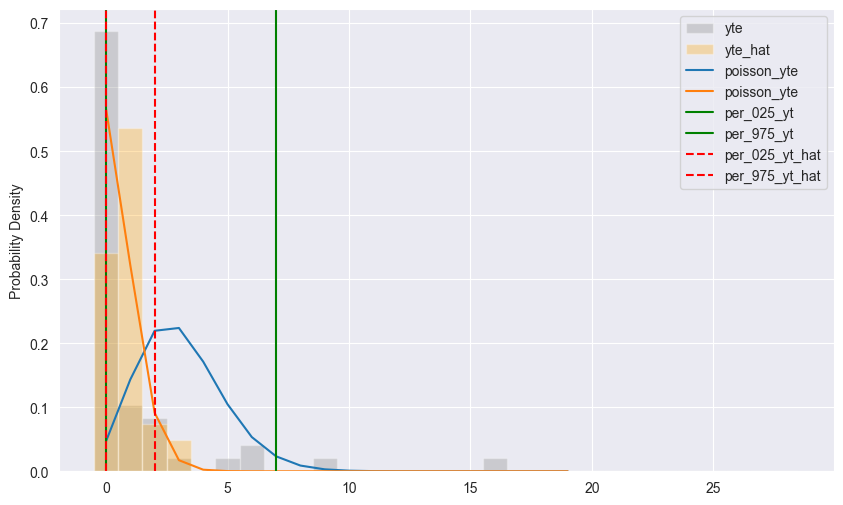

In [52]:
x = np.arange(0, 20)
poisson_yte = scipy.stats.poisson.pmf(x, mu_yte)
poisson_yte_hat = scipy.stats.poisson.pmf(x, mu_yte_hat)

per_025_yt = scipy.stats.poisson.ppf(0.025, mu_yte)
per_025_yt_hat = scipy.stats.poisson.ppf(0.025, mu_yte_hat)
per_975_yt = scipy.stats.poisson.ppf(0.975, mu_yte)
per_975_yt_hat = scipy.stats.poisson.ppf(0.975, mu_yte_hat)

plt.figure(figsize=(10, 6))
plt.hist(yte, bins=np.arange(0, 30) - 0.5, density=True, color='gray', alpha=0.3, label='yte')
plt.hist(yte_hat, bins=np.arange(0, 30) - 0.5, density=True, color='orange', alpha=0.3, label='yte_hat')
plt.plot(x, poisson_yte, label='poisson_yte')
plt.plot(x, poisson_yte_hat, label='poisson_yte')
plt.axvline(per_025_yt, color='green', label='per_025_yt')
plt.axvline(per_975_yt, color='green', label='per_975_yt')
plt.axvline(per_025_yt_hat, color='red', linestyle="--", label='per_025_yt_hat')
plt.axvline(per_975_yt_hat, color='red', linestyle="--", label='per_975_yt_hat')

plt.ylabel('Probability Density')
plt.legend()
plt.show()



## 3. Naiver Bayesklassifikator zur Gesichtserkennung
Implementieren Sie den Gaussian-Naïve-Bayes-Klassifikator aus der Vorlesung. Testen Sie Ihre Implementierung am Datensatz ''Labeled Faces in the Wild'' aus Aufgabe 2, wiederum nur für Personen, für die mindestens 70 Bilder existieren. Teilen Sie Ihren Datensatz in 60 % Trainings- und 40% Testdaten (nach vorheriger Zufalls-Permutation der Reihenfolge) und skalieren Sie die Bilder wieder auf 1/8 der Originalgröße. Führen Sie anschließend eine Hauptkomponentenanalyse auf den Trainingsdaten durch und projizieren Sie sowohl Trainings- als auch Testbilder auf die ersten 7 Eigengesichter. Trainieren Sie Ihren GNB-Klassifikator auf dem Trainingsdatensatz als ''George-W.-Bush-Detektor'', d.h. alle zu dieser Person gehörigen Bilder werden mit 1 gelabelt, alle sonstigen mit –1. Werten Sie Ihren Klassifikator sowohl auf den Trainings- wie auf den unabhängigen Testdaten aus. Bestimmen Sie dafür jeweils die Detektionswahrscheinlichkeit, Richtig-Negativ-Rate, Fehlalarmrate und Falsch-Negativ-Rate.


In [23]:
data = {
    'Feature1': range(1, 11),
    'Feature2': range(11, 21),
    'Names': ['George-W.-Bush', 'B', 'George-W.-Bush', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
}
df = pd.DataFrame(data)


def desicion_fkt(name, name_searched, labels=[1, -1]):
    return labels[0] if name == name_searched else labels[1]


df["Labels"] = df["Names"].transform(lambda name: desicion_fkt(name, 'George-W.-Bush'))
df

,Feature1,Feature2,Names,Labels
0,1,11,George-W.-Bush,1
1,2,12,B,-1
2,3,13,George-W.-Bush,1
3,4,14,D,-1
4,5,15,E,-1
5,6,16,F,-1
6,7,17,G,-1
7,8,18,H,-1
8,9,19,I,-1
9,10,20,J,-1


#### Zufallspermutation

In [27]:
xt, xte = train_test_split(df, test_size=0.4, random_state=42)

yt = xt.pop('Labels')
yt_names = xt.pop('Names')

yte_hat = xte.pop('Labels')
yte_names = xte.pop('Names')

xt.head()

,Feature1,Feature2,Names
7,8,18,H
2,3,13,George-W.-Bush
9,10,20,J
4,5,15,E
3,4,14,D
